Data set used here is from: https://www.kaggle.com/neuromusic/avocado-prices

neuromusic describes the columns as follows:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold


In [68]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

In [69]:
avoc_df = pd.read_csv('sample_data_files/avocado.csv')

In [70]:
# get rid of first column which has no information, only an automatic increment index
avoc_df = avoc_df.drop(columns=[x for x in avoc_df.columns if 'unnamed' in x.lower()])

In [71]:
# use dates for forming a date index
avoc_date_index = pd.DatetimeIndex(avoc_df.Date)
avoc_df.index = avoc_date_index
# get rid of now redundant date-related columns
avoc_df = avoc_df.drop(columns=['Date', 'year'])
avoc_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
Date,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


In [73]:
# get the monthly means of all columns (using data for the whole of the USA)
us_avoc_df = avoc_df[avoc_df.region == 'TotalUS']
# resample the data to a fixed monthly frequency
avoc_means_df = us_avoc_df.resample('M').mean()

Text(0.5, 1.0, 'Avocado prices in the US, 2015-2018')

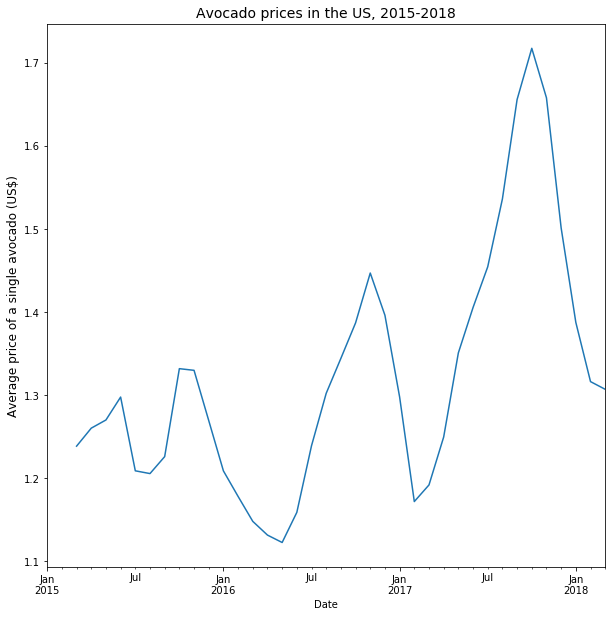

In [67]:
fig, ax = plt.subplots(figsize=(10, 10))
avoc_means_df['AveragePrice'].rolling(3).mean().plot()
ax.set_ylabel('Average price of a single avocado (US$)', fontsize=12)
ax.set_title('Avocado prices in the US, 2015-2018', fontsize=14)
